In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

# module containing the main functions
import utils as ut

## Single scenario with realistic parameters

In [7]:
# Sampling taus from lognormal with default parameters
tau_samp = ut.tau_sampler_lognorm()

# Defining the default realistic paramters
pars = ut.TT_params(tau_samp.taus, alpha0=1e-4, beta0=1)

# Integration parameters
t_steps, traj_steps, dt = 10000, 30, 0.003

In [8]:
times, T_trajs, P_trajs, S_trajs = ut.run_setting(pars, t_steps, dt, traj_steps=traj_steps)
T_tot = np.sum(T_trajs, axis=1)

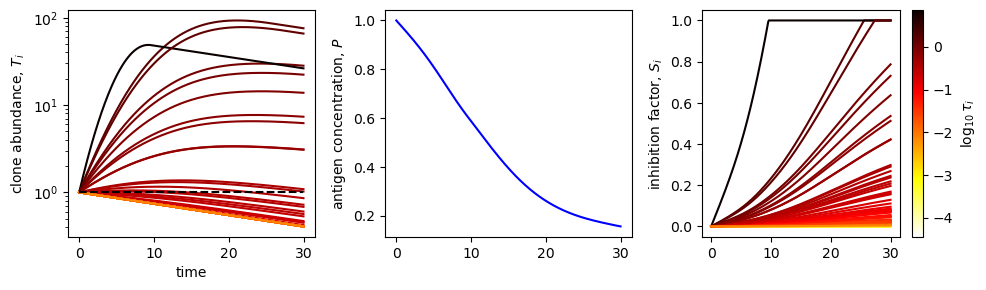

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,3))

ax1.set_yscale('log')
ax1.set_xlabel('time')
ax1.set_ylabel(r'clone abundance, $T_i$')
cmap = colormaps.get_cmap('hot_r')
cmap_norm = plt.Normalize(vmin=min(np.log10(pars.taus)), vmax=max(np.log10(pars.taus)))
for i, Ts in enumerate(T_trajs.T):
    color = cmap(cmap_norm(np.log10(pars.taus[i])))
    ax1.plot(times, Ts, c=color)
    
#ax1.plot(times, T_tot, c='b', label=r'$\sum_i T_i$')
ax1.plot(times, np.ones(len(times)), c='k', ls='--')
#ax1.legend()

ax2.set_ylabel(r'antigen concentration, $P$')
ax2.plot(times, P_trajs, c='b')

ax3.set_ylabel(r'inhibition factor, $S_i$')
for i, Ss in enumerate(S_trajs.T):
    color = cmap(cmap_norm(np.log10(pars.taus[i])))
    ax3.plot(times, Ss, c=color)
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=cmap_norm)
sm.set_array([])
fig.colorbar(sm, ax=ax3, label=r'$\log_{10} \tau_i$')

plt.tight_layout()

name = 'dyn_realistic'
plt.savefig('plots/'+name+'.svg', dpi=200, facecolor='w')

pars.print_on_file('plots/', name+'_pars', tau_samp.get_pars())

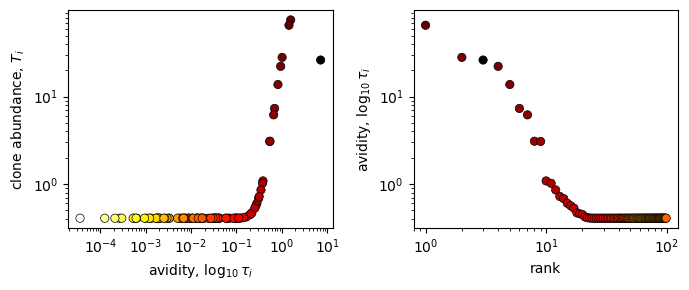

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7,3))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'avidity, $\log_{10} \tau_i$')
ax1.set_ylabel(r'clone abundance, $T_i$')
ax1.scatter(pars.taus, T_trajs[-1], c=np.log10(pars.taus), cmap=cmap, edgecolor='black', linewidth=0.5)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel(r'avidity, $\log_{10} \tau_i$')
ax2.set_xlabel(r'rank')
sort_ids = np.argsort(T_trajs[-1])[::-1]
ranks = np.arange(len(T_trajs[-1]))
ax2.scatter(ranks, T_trajs[-1][sort_ids], c=np.log10(pars.taus)[sort_ids], cmap=cmap, edgecolor='black', linewidth=0.5)

plt.tight_layout()
plt.savefig('plots/'+name+'_ab_stats.svg', dpi=200, facecolor='w')